# VaR Models

In [12]:
import numpy as np
import pandas as pd

from scipy.stats import norm
import time

import matplotlib.pyplot as plt

## Simulated Data Example


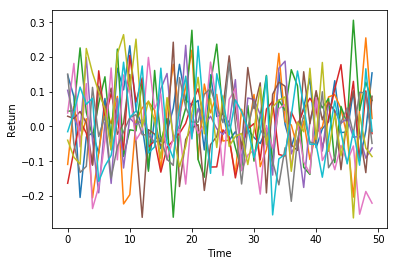

In [4]:
# mu = 0.01, std = 0.10, 1000 bars, 10 assets
mu = 0.01
sigma = 0.10
bars = 1000
num_assets = 10

returns = np.random.normal(mu, sigma, (bars, num_assets))

# Fake asset names
names = ['Asset %s' %i  for i in range(num_assets)]

# Put in a pandas dataframe
returns = pd.DataFrame(returns, columns=names)

# Plot the last 50 bars
plt.plot(returns.head(50))
plt.xlabel('Time')
plt.ylabel('Return');

## Historical (Non-Parametric) VaR

In [5]:
weights = np.ones((10, 1))
# Normalize
weights = weights / np.sum(weights)

def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    returns = returns.fillna(0.0)
    # Multiply asset returns by weights to get one weighted portfolio return
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # Compute the correct percentile loss and multiply by value invested
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [6]:
#var at 95
value_invested = 1000000

value_at_risk(value_invested, returns, weights, alpha=0.95)

-40503.166470067656

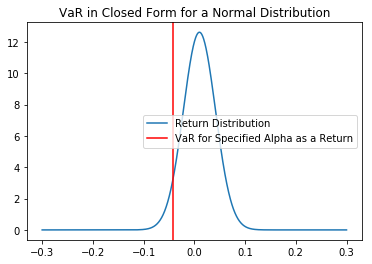

In [8]:
# Portfolio mean return is unchanged, but std has to be recomputed
# This is because independent variances sum, but std is sqrt of variance
portfolio_std = np.sqrt( np.power(sigma, 2) * num_assets ) / num_assets

# manually 
(mu - portfolio_std * norm.ppf(0.95)) * value_invested

def value_at_risk_N(mu=0, sigma=1.0, alpha=0.95):
    return mu - sigma*norm.ppf(alpha)


x = np.linspace(-3*sigma,3*sigma,1000)
y = norm.pdf(x, loc=mu, scale=portfolio_std)
plt.plot(x,y);
plt.axvline(value_at_risk_N(mu = 0.01, sigma = portfolio_std, alpha=0.95), color='red', linestyle='solid');
plt.legend(['Return Distribution', 'VaR for Specified Alpha as a Return'])
plt.title('VaR in Closed Form for a Normal Distribution');

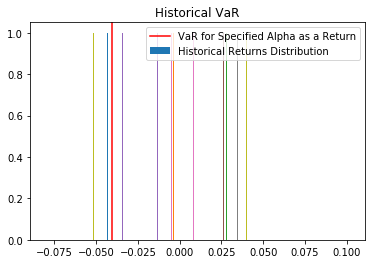

In [10]:
lookback_days = 520
alpha = 0.95

# Multiply asset returns by weights to get one weighted portfolio return
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(value_invested, returns, weights, alpha=0.95)
# Need to express it as a return rather than absolute loss
portfolio_VaR_return = portfolio_VaR / value_invested

plt.hist(portfolio_returns, bins=20)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.legend(['VaR for Specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical VaR');

In [11]:
# OEX components as of 3/31/16
# http://www.cboe.com/products/indexcomponents.aspx?DIR=OPIndexComp&FILE=snp100.doc
oex = ['MMM','T','ABBV','ABT','ACN','ALL','GOOGL','GOOG','MO','AMZN','AXP','AIG','AMGN','AAPL','BAC',
       'BRK-B','BIIB','BLK','BA','BMY','CVS','COF','CAT','CELG','CVX','CSCO','C','KO','CL','CMCSA',
       'COP','CSOT','DHR','DOW','DUK','DD','EMC','EMR','EXC','XOM','FB','FDX','F','GD','GE','GM','GILD',
       'GS','HAL','HD','HON','INTC','IBM','JPM','JNJ','KMI','LLY','LMT','LOW','MA','MCD','MDT','MRK',
       'MET,','MSFT','MDZL','MON','MS','NKE','NEE','OXY','ORCL','PYPL','PEP','PFE','PM','PG','QCOM',
       'RTN','SLB','SPG','SO','SBUX','TGT','TXN','BK','PCLN','TWX','FOXA','FOX','USB','UNP','UPS','UTX',
       'UNH','VZ','V','WMT','WBA','DIS','WFC']
tickers = symbols(oex)
num_stocks = len(tickers)

NameError: name 'symbols' is not defined

In [ ]:
start = time.time()
data = get_pricing(tickers, fields='close_price', start_date='2014-01-01', end_date='2016-04-04')
end = time.time()
print "Time: %0.2f seconds." % (end - start)

returns = data.pct_change()
returns = returns - returns.mean(skipna=True) # de-mean the returns

data.plot(legend=None);
returns.plot(legend=None); 

In [ ]:
returns = data.pct_change()
returns = returns - returns.mean(skipna=True) # de-mean the returns

data.plot(legend=None);
returns.plot(legend=None); 

In [ ]:
value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=520)

In [ ]:
lookback_days = 520
alpha = 0.95

# Multiply asset returns by weights to get one weighted portfolio return
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR = value_at_risk(value_invested, returns, weights, alpha=0.95)
# Need to express it as a return rather than absolute loss
portfolio_VaR_return = portfolio_VaR / value_invested

plt.hist(portfolio_returns, bins=20)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.legend(['VaR for Specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical VaR');
plt.xlabel('Return');
plt.ylabel('Observation Frequency');